# Versuch 2: Data Augmentation

## Thema

Auch in diesem Versuch ist das Ziel die Klassifizierung in den Klassen befestigt und unbefestigt von Fahrradwegen. 
Als Regulierung der Überanpassung und besseren Generalisierung des Modells soll Data Augmentation verwendet werden. Wie die Generierung der zusätzlichen Daten umgesetzt wird siehe das Notebook unter bildverarbeitung/dataAugmentationExperiment.ipynb in dem gleichen Repository. Als Quellbilder werden die gleichen Bilder aus dem Versuch 1 genommen. 

## Hypothese

Mit der Vermehrung anhand von Data Augmentation der Trainingsdaten ist eine genauere Klassifizierung möglich als in Versuch 1. Unterstützt wird die These durch [The Effectiveness of Data Augmentation in Image Classification using Deep Learning](https://arxiv.org/abs/1712.04621). In dem Artikel wird untersucht ob es möglich ist mit Data Augmentation einen kleinen Datensatz (wenige tausend Daten) mit Labeln zu nutzen anstelle eines Datensatz mit mehreren Hunderttausenden Bildern und keinen Labeln, um ein Faltungsnetz zu trainieren.  

## Versuchsaufbau
 
Wie in Versuch 1 beschrieben kommen die Daten aus den Datensatz 22. Dabei wird der gleiche Ausschnitt und Skalierung der Bilder verwendet. Auch in diesem Versuch soll für die Klassifizierung ein Faltungsnetzt trainiert werden siehe Tab. 2.1, um einen Überblick der verwendeten Paramater des Netz zu bekommen. Das Neuronale Netzt wird auf einem PC mit einer GTX 1060 trainiert.   
   
Klasse | Verwendeter Datensatz | Anzahl der Quellbilder | Anzahl der mit Data Augmentation erzeugten Bilder | Gesamtzahl der Bilder | Größe der Zielbilder(Skaliert)
--- | --- | --- | --- | --- |
 unbefestigt | 22 | 1000 | bis zu 400 | bis zu 1400 | 70px x 362px 
 befestigt | 22 | 1000 | bis zu 400 | bis zu 1400 | 70px x 362px
Tabelle 2.1: Beschreibung der Trainingsdaten

## Versuchsdurchführung

Zuerst werden die zusätzlichen Daten generiert (siehe Abb. 1) in dem Notebook dataAugmentationExperiment.ipynb. Dabei werden die augmentierten Daten nur aus den Trainingsdaten erzeugt. Die Trainingsdaten plus den generierten und Validierungsdaten werden anschließend geladen. Ein Faltungsnetz wird im nächsten Schritt trainiert mit den Parametern aus dem Versuch 1. Die Anzahl der Epochen sind 100 wobei Early Stopping gnutzt wird. Das jeweils beste gefundene Modell nach der Metrik Test accuracy wird abgespeichert in den Ordner ergebnisse_versuch2/.

![alt text][dataAug0_1]
Abbildung 2.1: Beispiel Daten Augmentation mit mehreren Transformationen im  Wertebereich [-0.1,0.1] einer Bildaufnahme 

[dataAug0_1]: ../daten/datensatz/22/abb/dataAugmentation0_1.jpg "Daten Augmentation mit mehreren Transformationen im  Wertebereich [-0.1,0.1] einer Bildaufnahme"

### Versuch 2.1: Leicht Transformierte generierte Trainingsdaten

Mit Data Augmentation werden zusätzliche 400 Trainingsdaten je Klasse erzeugt. Dabei werden mit den ImageDataGenerator Transformationen in dem Wertebereich [-0.1,0.1] erzeugt(siehe dataAugmentationExperiment.ipyn). Angwendet werden die Transformationen Rotation, vertikale sowie horizontale Verschiebung, Scherung, Zoom, horizontale und vertikale Spiegelung. Die erzeugten Bilder sind also nur leicht abgeändert(Abb. 2.1). 

### Versuch 2.2: 200 zusätzliche Trainingsdaten je Klasse

In diesem Versuch ist die Anzahl der generierten Trainingsdaten, um die Hälfte auf 400 reduziert. Insgesamt beträgt die Anzahl der Trainingsdaten 2000 Bilder. Die Erwartung ist, dass sich die Trainings Accuracy und die validierungs Accuracy leicht senken.

### Versuch 2.3: Stärker Transformierte generierte Trainingsdaten

Die vorherigen Versuche ergaben immer noch eine höhere Trainings Accuracy. In diesem Versuch werden die generierten Daten stärker Transformiert mit dem Wertebereich von [-1.0,1.0] siehe Abb. 2. Dadurch sollte die Trainings Accuracy sinken und die validierungs Accuracy steigen. 

![alt text][dataAug1_0]
Abbildung 2.2: Daten Augmentation mit Transformationen im zufälligen Wertebereich von [-1.0,1.0] mehrere Bildaufnahmen der Klasse unbefestigt aus den Datensatz 22

[dataAug1_0]: ../daten/datensatz/22/abb/dataAugmentation1_0.jpg "Daten Augmentation mit Transformationen im zufälligen Wertebereich von [-1.0,1.0] mehrere Bildaufnahmen der Klasse unbefestigt aus den Datensatz 22"

### Versuch 2.4: Generierte Trainingsdaten im Wertebereich 0.3

Das Ergebnis aus Versuch 2.3 siehe Tab. 3 hat gezeigt das sich die Trainings sowie validierungs Accuracy reduziert hat. Durch eine weniger starke regulierung der Trainingsdaten sollte sich ein besseres Ergebnis für die Metrik validierungs Accuracy ergeben. Die generierten Bilder wurden mit der Keras Data Augmentation Methode im Wertebereich [-0.3,0.3] erzeugt.

![alt text][dataAug1_0]
Abbildung 2.2: Daten Augmentation mit Transformationen im zufälligen Wertebereich von [-0.3,0.3] mehrere Bildaufnahmen der Klasse unbefestigt aus den Datensatz 22

[dataAug1_0]: ../daten/datensatz/22/abb/dataAugmentation0_5.jpg "Daten Augmentation mit Transformationen im zufälligen Wertebereich von [-0.3,0.3] mehrere Bildaufnahmen der Klasse unbefestigt aus den Datensatz 22"

### Versuch 2.5: Generierte Trainingsdaten im Wertebereich 0.2

Erwartung Trainings und validierungs Accuracy niedriger als im Versuch 2.4 siehe Tab. 2.2.

## Versuchsbeobachtung
 
Versuch Nr. | validerungs Accuracy | validierungs Loss | Trainings Accuracy | Trainings Loss | Gesamtanzahl der mit Data Augmentation erzeugten Bilder
--- | --- | --- | --- | --- | --|
2.1 | 0.9525 | 0.4130 | 0.9946 | 0.0181 | 800
2.2 | 0.9500 | 0.3280 | 0.9945 | 0.0187 | 400
2.3 | 0.9100 | 0.2735 | 0.8808 | 0.2933 | 800
2.4 | 0.9550 | 0.3247 | 1.0    | 0.0030 | 800
2.5 | 0.9500 | 0.3646 | 0.9996 | 0.0025 | 800
Tabelle 2.2: Accuracy und Loss Ergebnisse der einzelnen Versuche

### Versuch 2.1

Wie in Tab. 2.2 zu sehen ist die validierungs Accuracy mit 95,25% höher als beim Training. Das beste Modell aus Versuch 1 hat den gleichen validierungs Accuracy. Auf Abb. 2.3. ist die dazugehörige Konfusionsmatrix der Validierungsdaten zu sehen. 

TODO ---Im Vergleich mit der Abb. 2.4 der Konfusionsmatrix des Versuchs 1.9 fällt auf das die Anzahl der falsch klassifizierten Bilder für beide Klassen gleich ist. Dabei ist der Anteil der Bilder in dem Validierungsdatensatz der Klasse unbefestigt mit 52% höher als der Klasse befestigt. Auf Abb. 2.5 ist zu sehen, dass sich das Modell nach ca. 22 Epochen beginnt überanzupassen.---   
<img src="ergebnisse_versuch2/konfusionsmatrix_versuch2_1.png" width="300" alt="konfusionsmatrix_versuch2_1"/>
Abbildung 2.3: Konfusionsmatrix des Versuchs 2.1
<img src="ergebnisse_versuch1/konfusionsmatrix_versuch1_9.png" width="300" alt="konfusionsmatrix_versuch1_9"/>
Abbildung 2.4: Konfusionsmatrix des Versuchs 1.9
<img src="ergebnisse_versuch2/accuracy_versuch2_1.png" width="300" alt="accuracy_versuch2_1"/>
Abbildung 2.5: Accuracy Historie für Versuch 2.1

### Versuch 2.2

Bei dem Versuch 2.1(Abb. 2.5) und 2.2(Abb. 2.7) ist zu sehen wie beim Faltungsnetz mit zunehmender Anzahl an Epochen die Trainings Accuracy steigt. Im Vergleich zu Versuch 2.1 hat sich das Ergebnis bei Reduzierung der generierten Bilder kaum geändert (siehe Tab 2.2). Die validierungs Accuracy ist nur um 0.25 % höher.
<img src="ergebnisse_versuch2/konfusionsmatrix_versuch2_2.png" width="300" alt="konfusionsmatrix_versuch2.2"/>
Abbildung 2.6: Konfusionsmatrix des Versuchs 2.2
<img src="ergebnisse_versuch2/accuracy_versuch2_2.png" width="300" alt="accuracy_versuch2.2"/>
Abbildung 2.7: Accuracy Historie für Versuch 2.2


## Versuch 2.3

Die Trainings Accuracy ist gesunken auf 88,08%(Tab. 2) aber der validierungs Accuracy ist auch gefallen auf 91% für das beste gefundene Netz nach 12 Epochen. Auf Abb. 2.9 ist zu sehen das, dass Model überangepasster als im Versuch 2.2(Abb. 2.7) ist.   
<img src="ergebnisse_versuch2/accuracy_versuch2_3.png" width="300" alt="accuracy_versuch2.3"/>
Abbildung 2.8: Accuracy Historie für Versuch 2.3

## Versuch 2.4

Das Ergebnis (Tab. 2.2) wurde nach 40 Epochen erreicht. Die validierungs Accuracy ist höher 0.25% höher als im Versuch 1.9.
Auf Abb. 2.9 ist zu sehen das die falsch klassifizierten Bilder relativ gleich verteilt sind mit 10 Bilder für die Klasse unbefestigt und 8 Bilder für die Klasse befestigt. Mit einem Trainings Accuracy von 100% ist das Modell überangepasst. 

<img src="ergebnisse_versuch2/konfusionsmatrix_versuch2_4.png" width="300" alt="konfusionsmatrix_versuch2.4"/>
Abbildung 2.9: Konfusionsmatrix des Versuchs 2.2
<img src="ergebnisse_versuch2/accuracy_versuch2_4.png" width="300" alt="accuracy_versuch2.4"/>
Abbildung 2.10: Accuracy Historie für Versuch 2.2

## Versuch 2.5

Ein weniger starker Transformationswertebereich hat zu keinem besseren Ergebnis der Accuracy geführt. Der Unterschied ist mit 0.50% validierungs Accuracy Verringerung zu Versuch 2.4 eher gering.
<img src="ergebnisse_versuch2/accuracy_versuch2_5.png" width="300" alt="accuracy_versuch2.5"/>
Abbildung 2.11: Accuracy Historie für Versuch 2.5

## Auswertung

Wie in Tab. 2.2 zu sehen hat bei diesen Versuchen der Versuch 2.4 mit einer validierungs Accuracy von 95,50% am besten abgeschnitten. Dabei wurden zusätzlich mit Data Augmentation Bilder generiert. Als Bibliothek für die Erzeugung wurde die Keras ImageDataGenerator Methode genutzt. Für Versuch 2.4 wurde die Methode mit den Transformationen Rotation, vertikale sowie horizontale Verschiebung, Scherung, Zoom aufgerufen mit dem zufälligen Wertebereich [-0.3,0.3]. Zudem wurden die Transformationen horizontale und vertikale Spiegelung auf den Trainingsdaten angewendet. Durch den Versuch hat sich gezeigt das mit Data Augmentation die validation Accuracy erhöht werden kann. In diesem Fall nur leicht von 95.25& im Versuch 1.9 auf 95.50% in Versuch 2.4. Dabei ist auf Abb. 2.9 zu sehen, dass die falsch klassifizierten Bilder relativ gleich verteilt sind mit 10 Bilder für die Klasse unbefestigt und 8 Bilder für die Klasse befestigt im Gegensatz zu Versuch 1.9 siehe Abb. 2.4. Mit einer Trainings Accuracy von 100% ist das Modell überangepasst. Eine stärkere Transformierung der generierten Bilder wie in Versuch 2.3 hat kein besseres Ergebnis in diesen Versuch geliefert. Für ein möglicherweise besseres Ergebnis können noch andere Data Augmentaion Methoden ausprobiert werden wie etwa [imgaug](https://github.com/aleju/imgaug) oder [CycleGAN](https://github.com/junyanz/CycleGAN).



In [78]:
from __future__ import print_function
from hyperopt import Trials, STATUS_OK, rand
from hyperas import optim
from hyperas.distributions import uniform, choice

In [79]:
# Import von Bibliotheken
import os
import cv2
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
from keras.models import load_model
import keras.callbacks as cb
import numpy as np
import pandas

In [80]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [81]:
# Um Grafiken zu plotten
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import seaborn

In [82]:
experimentNumber  = 5           # Die Nummer des Versuchs
numberOfAugmentedData = 800     # Anzahl der generierten Bilder 
images            = []          # Liste für alle Bilder
imagesNp          = np.array(0) # soll Bilder als numpy Array halten
startIndexUnpaved = 0           # Index Beginn der befestigte Wege
numberOfChannels  = 3           # Anzahl der Farbkanäle
numberOfClasses   = 2           # Anzahl der Klassen
classNames        = ['unbefestigt','befestigt'] # Namen der Klassen
yLabels           = np.array(0) # Labels / Klassen zuordnung
yShuffle          = np.array(0) # Labels mit der Methode shuffle() vermischt 
xShuffle          = np.array(0) # Bilder zum trainieren mit shuffle() vermischt
xTrain            = np.array(0) # Trainingsdaten (Bilder) 
xTest             = np.array(0) # Testdaten (Bilder)
yTrain            = np.array(0) # Klassen zuordnungen (Labels) für xTrain
yTest             = np.array(0) # Klassen zuordnung (Lables) für xTest

In [83]:
# Läd alle Bildaufnahmen der Klasse unbefestigt 
imagePathName = 'C:/Users/morro/Documents/fahrradwegeKlassifizierung/daten/datensatz/22/unbefestigt/zugeschnitten/'
files = os.listdir(imagePathName)
for file in files:
    if "jpg" not in file:
        continue
    images.append(cv2.cvtColor(cv2.imread(imagePathName + file),cv2.COLOR_BGR2RGB))

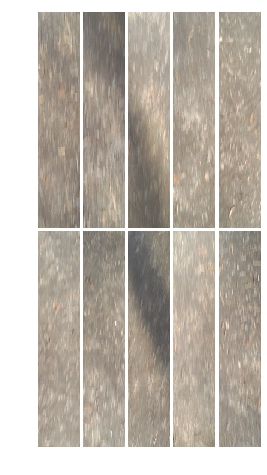

In [84]:
# Einige Beispiele von unbefestigten Wegen
fig = plt.figure(1,figsize=(8,8))
grid = ImageGrid(fig, 111, nrows_ncols=(2, 5), axes_pad=0.05)
imageToShow = 10
for i, img in enumerate(images[0: imageToShow]):
    ax = grid[i]
    ax.imshow(img)
    ax.axis('off')
plt.show()

In [85]:
# Läd alle Bildaufnahmen der Klasse befestigt
startIndexpaved = len(images)
imagePathName = 'C:/Users/morro/Documents/fahrradwegeKlassifizierung/daten/datensatz/22/befestigt/zugeschnitten/'
files = os.listdir(imagePathName)
for file in files:
    if "jpg" not in file:
        continue
    images.append(cv2.cvtColor(cv2.imread(imagePathName + file),cv2.COLOR_BGR2RGB))

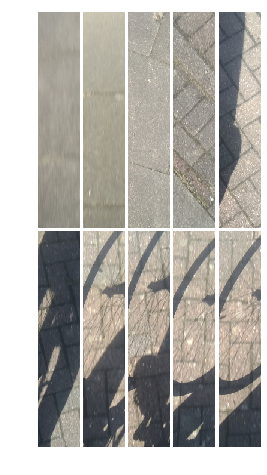

In [86]:
# Einige Beispiele von befestigten Wegen
fig = plt.figure(1,figsize=(8,8))
grid = ImageGrid(fig, 111, nrows_ncols=(2, 5), axes_pad=0.05)
imageToShow = 10
for i, img in enumerate(images[startIndexpaved: startIndexpaved + imageToShow]):
    ax = grid[i]
    ax.imshow(img)
    ax.axis('off')
plt.show()

In [87]:
# Y Klassen Labels zuweisen
# 0 unbefestigt
# 1 befestigt
yLabels = np.zeros(len(images)) 
yLabels[startIndexpaved:len(images)] = 1

In [88]:
# Erstellt einen "one hot encoding vector" für die gelabelten Bilder
yLabels = np_utils.to_categorical(yLabels, 0)

In [89]:
len(images)

2000

In [90]:
yLabels[998]

array([1., 0.])

In [91]:
# Setzten des RandomState um reproduzierbare Ergebnisse zu erzielen.
np.random.seed(42)

In [92]:
imagesNp = np.array(images)
imagesNp = imagesNp.astype('float32')
# Transfomierung der Bildpunkte auf den Wetebereich von 0 bis 1
imagesNp /= 255
print (imagesNp.shape) # Form des Arrays (Anzahl der Bilder, Höhe, Breite, Farbkanäle)

(2000, 362, 70, 3)


In [93]:
# Mischen der Trainingsdaten
xShuffle, yShuffle = shuffle(imagesNp,yLabels)
# Aufteilung in Trainings und Testdaten
xTrain, xTest, yTrain, yTest = train_test_split(xShuffle, yShuffle, test_size=0.2)

In [94]:
yTrain.shape[0]

1600

In [95]:
# yTrain Labels von den augmentierten Bildern hinzufügen
# Schritt 1: zweidimensionales Array der Größe yTrain.shape[0] + Anzahl der augmentierten Bilder erstellen
# 2: Array Werte aus yTrain dem Array zuweisen
# 3: Label aus den generierten Daten zuweisen
# 4: erstelltes Array yTrain zuweisen
yTrainTemp = np.zeros((yTrain.shape[0]+numberOfAugmentedData,yTrain.shape[1]))
yTrainTemp[0:yTrain.shape[0]] = yTrain
yTrainTemp[yTrain.shape[0]:(yTrain.shape[0]+(int(numberOfAugmentedData/2)))] = [1.,0.] # unbefestigt
yTrainTemp[(yTrain.shape[0]+(int(numberOfAugmentedData/2))):(yTrain.shape[0]+numberOfAugmentedData)] = [0.,1.] # befestigt
yTrain = yTrainTemp

In [96]:
yTrain[1999]

array([1., 0.])

In [97]:
# Bilder der Klasse unbefestigt erzeugt mit Data Augmentation laden
unpavedImages = []
imagePathName = 'C:/Users/morro/Documents/fahrradwegeKlassifizierung/daten/datensatz/22/unbefestigt/augmentation/'
files = os.listdir(imagePathName)
i = 0
for file in files:
    if i == numberOfAugmentedData: 
        break
    if "jpg" not in file:
        continue
    unpavedImages.append(cv2.cvtColor(cv2.imread(imagePathName + file),cv2.COLOR_BGR2RGB))
    i = i + 1

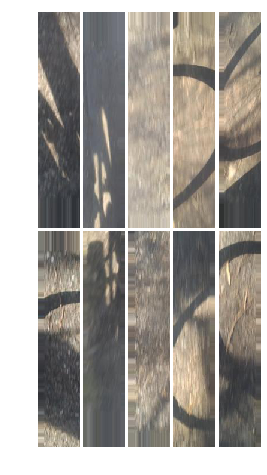

In [98]:
# Einige Beispiele von befestigten Wegen
fig = plt.figure(1,figsize=(8,8))
grid = ImageGrid(fig, 111, nrows_ncols=(2, 5), axes_pad=0.05)
imageToShow = 10
for i, img in enumerate(unpavedImages[0:imageToShow]):
    ax = grid[i]
    ax.imshow(img)
    ax.axis('off')
plt.show()

In [99]:
# unpaved List in Array umwandeln
unpavedImagesNp = np.array(unpavedImages)
unpavedImagesNp = unpavedImagesNp.astype('float32')
# Transfomierung der Bildpunkte auf den Wetebereich von 0 bis 1
unpavedImagesNp /= 255
print (unpavedImagesNp.shape) # Form des Arrays (Anzahl der Bilder, Höhe, Breite, Farbkanäle)

(400, 362, 70, 3)


In [100]:
# Bilder der Klasse befestigt erzeugt mit Data Augmentation laden
pavedImages = []
imagePathName = 'C:/Users/morro/Documents/fahrradwegeKlassifizierung/daten/datensatz/22/befestigt/augmentation/'
files = os.listdir(imagePathName)
i = 0
for file in files:
    if i == numberOfAugmentedData:
        break
    if "jpg" not in file:
        continue
    pavedImages.append(cv2.cvtColor(cv2.imread(imagePathName + file),cv2.COLOR_BGR2RGB))
    i = i +1

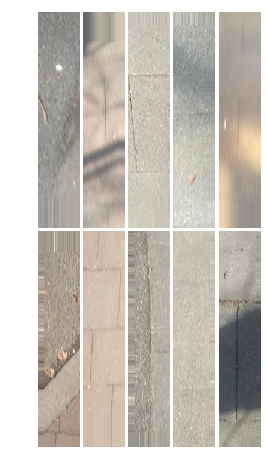

In [101]:
# Einige Beispiele von befestigten Wegen
fig = plt.figure(1,figsize=(8,8))
grid = ImageGrid(fig, 111, nrows_ncols=(2, 5), axes_pad=0.05)
imageToShow = 10
for i, img in enumerate(pavedImages[0:imageToShow]):
    ax = grid[i]
    ax.imshow(img)
    ax.axis('off')
plt.show()

In [102]:
# unpaved List in Array umwandeln
pavedImagesNp = np.array(pavedImages)
pavedImagesNp = pavedImagesNp.astype('float32')
# Transfomierung der Bildpunkte auf den Wetebereich von 0 bis 1
pavedImagesNp /= 255
print (pavedImagesNp.shape) # Form des Arrays (Anzahl der Bilder, Höhe, Breite, Farbkanäle)

(400, 362, 70, 3)


In [103]:
xTrain.shape

(1600, 362, 70, 3)

In [104]:
# xTrain um generierte Bilder erweitern
xTrainTemp = np.zeros((xTrain.shape[0]+numberOfAugmentedData,xTrain.shape[1],xTrain.shape[2],xTrain.shape[3]))
xTrainTemp[0:xTrain.shape[0]] = xTrain
xTrainTemp[xTrain.shape[0]:(xTrain.shape[0]+(int(numberOfAugmentedData/2)))] = unpavedImagesNp # unbefestigt
xTrainTemp[(xTrain.shape[0]+(int(numberOfAugmentedData/2))):(xTrain.shape[0]+numberOfAugmentedData)] = pavedImagesNp # befestigt
xTrain = xTrainTemp

In [105]:
unpavedImagesNp.shape

(400, 362, 70, 3)

In [106]:
len(xTrain) # Anzahl der Trainingsdaten

2400

In [107]:
len(yTest) # Anzahl der Testdaten

400

<b> Initialisierung des Faltungsnetz </b>
*****

In [108]:
# Parameter für das CNN
inputShape     = imagesNp[0].shape # Eingangs Array-Form 
numNeuronsC1   = 32                # Anzahl der Filter / 1 Faltungsschicht
numNeuronsC2   = 32                # Anzahl der Filter / 2 Faltungsschicht
numNeuronsC3   = 64                # Anzahl der Filter / 3 Faltungsschicht
numNeuronsD1   = 64                # Anzahl der Neuronen des Fully connected layer - vollverbundene Schicht
poolSize       = 2                 # Größe der Pooling-Layer
convKernelSize = 3                 # Größe des Faltungskern n*n

In [109]:
model = Sequential()
model.add(Conv2D(numNeuronsC1, (convKernelSize, convKernelSize), padding='valid',input_shape=inputShape))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(poolSize, poolSize)))
model.add(Dropout(0.05))

model.add(Conv2D(numNeuronsC2, (convKernelSize, convKernelSize)))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(poolSize, poolSize)))
model.add(Dropout(0.33))
  
model.add(Conv2D(numNeuronsC3, (convKernelSize, convKernelSize)))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(poolSize, poolSize)))
model.add(Dropout(0.10))

model.add(Flatten())
model.add(Dense(numNeuronsD1))
model.add(Activation('elu'))
model.add(Dropout(0.46))

model.add(Dense(2))
model.add(Activation('softmax')) 

In [110]:
# Zusammenfassung der Parameter des neuralen Netzes
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 360, 68, 32)       896       
_________________________________________________________________
activation_6 (Activation)    (None, 360, 68, 32)       0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 180, 34, 32)       0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 180, 34, 32)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 178, 32, 32)       9248      
_________________________________________________________________
activation_7 (Activation)    (None, 178, 32, 32)       0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 89, 16, 32)        0         
__________

<b> Trainieren des Faltungsnetz</b>
*****

In [111]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])

In [112]:
numEpoch=100
# Early Stopping unterbricht das Training, wenn nach n Epochen die Kostenfunktion nicht weiter minimiert werden konnte 
earlyStopping = cb.EarlyStopping(monitor='val_acc', patience=20, verbose=0, mode='max')   
# Speichert das beste Modell mit der höhsten Test Accuracy ab
checkpointSafe = cb.ModelCheckpoint('ergebnisse_versuch2/modell_versuch2_' + str(experimentNumber), monitor='val_acc', save_best_only=True)
hist = model.fit(xTrain, yTrain, batch_size=32, epochs=numEpoch,
              validation_data=(xTest, yTest), callbacks=[earlyStopping,checkpointSafe])

Train on 2400 samples, validate on 400 samples
Epoch 1/100
2400/2400 [==============================] - 6s 2ms/step - loss: 0.8515 - acc: 0.6025 - val_loss: 0.4972 - val_acc: 0.7350
Epoch 2/100
2400/2400 [==============================] - 5s 2ms/step - loss: 0.5215 - acc: 0.7492 - val_loss: 0.8174 - val_acc: 0.6725
Epoch 3/100
2400/2400 [==============================] - 5s 2ms/step - loss: 0.5147 - acc: 0.7508 - val_loss: 1.3304 - val_acc: 0.6075
Epoch 4/100
2400/2400 [==============================] - 5s 2ms/step - loss: 0.4825 - acc: 0.7721 - val_loss: 0.4325 - val_acc: 0.7875
Epoch 5/100
2400/2400 [==============================] - 5s 2ms/step - loss: 0.4381 - acc: 0.7963 - val_loss: 0.4638 - val_acc: 0.7975
Epoch 6/100
2400/2400 [==============================] - 5s 2ms/step - loss: 0.4194 - acc: 0.8242 - val_loss: 0.5125 - val_acc: 0.7875
Epoch 7/100
2400/2400 [==============================] - 5s 2ms/step - loss: 0.3806 - acc: 0.8400 - val_loss: 0.4571 - val_acc: 0.7900
Epoch 8/

Epoch 61/100
2400/2400 [==============================] - 5s 2ms/step - loss: 0.0088 - acc: 0.9958 - val_loss: 0.4751 - val_acc: 0.9325
Epoch 62/100
2400/2400 [==============================] - 5s 2ms/step - loss: 0.0130 - acc: 0.9963 - val_loss: 0.6398 - val_acc: 0.8875
Epoch 63/100
2400/2400 [==============================] - 5s 2ms/step - loss: 0.0061 - acc: 0.9983 - val_loss: 0.4129 - val_acc: 0.9425
Epoch 64/100
2400/2400 [==============================] - 5s 2ms/step - loss: 0.0033 - acc: 0.9983 - val_loss: 0.5134 - val_acc: 0.9275


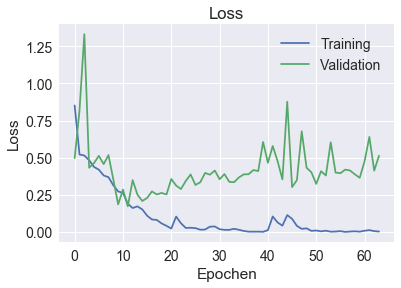

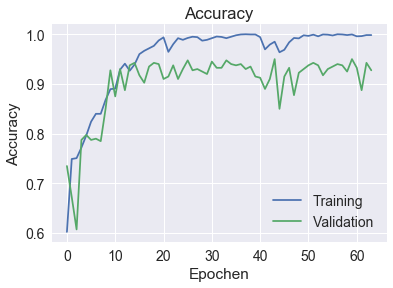

In [113]:
plt.figure(4)
plt.title('Loss')
plt.xlabel('Epochen')
plt.ylabel('Loss')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.grid(True)
plt.savefig('ergebnisse_versuch2/loss_versuch2_' + str(experimentNumber))
plt.figure(1)
plt.title('Accuracy')
plt.xlabel('Epochen')
plt.ylabel('Accuracy')
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.legend(['Training', 'Validation'], loc='lower right')
plt.grid(True)
plt.savefig('ergebnisse_versuch2/accuracy_versuch2_' + str(experimentNumber))
plt.show()

[[186  22]
 [  7 185]]


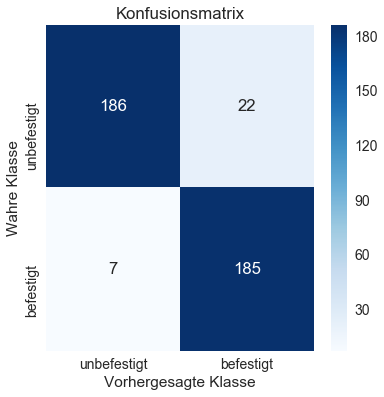

In [114]:
# Konfusionsmatrix
validPreds = model.predict(xTest)
validPreds = np.argmax(validPreds, axis=1)
yTestMax = np.argmax(yTest,axis=1)
cnfMatrix = confusion_matrix(yTestMax, validPreds)
print(cnfMatrix)
seaborn.set(font_scale=1.4)
fig, ax = plt.subplots(figsize=(6,6)) 
ax = seaborn.heatmap(cnfMatrix, fmt="d", cmap=plt.cm.Blues, ax=ax , annot=True)
ax.set_xticklabels(classNames)
ax.set_yticklabels(classNames)
plt.title('Konfusionsmatrix')
plt.ylabel('Wahre Klasse')
plt.xlabel('Vorhergesagte Klasse')
plt.savefig('ergebnisse_versuch2/konfusionsmatrix_versuch2_' + str(experimentNumber))
plt.show()

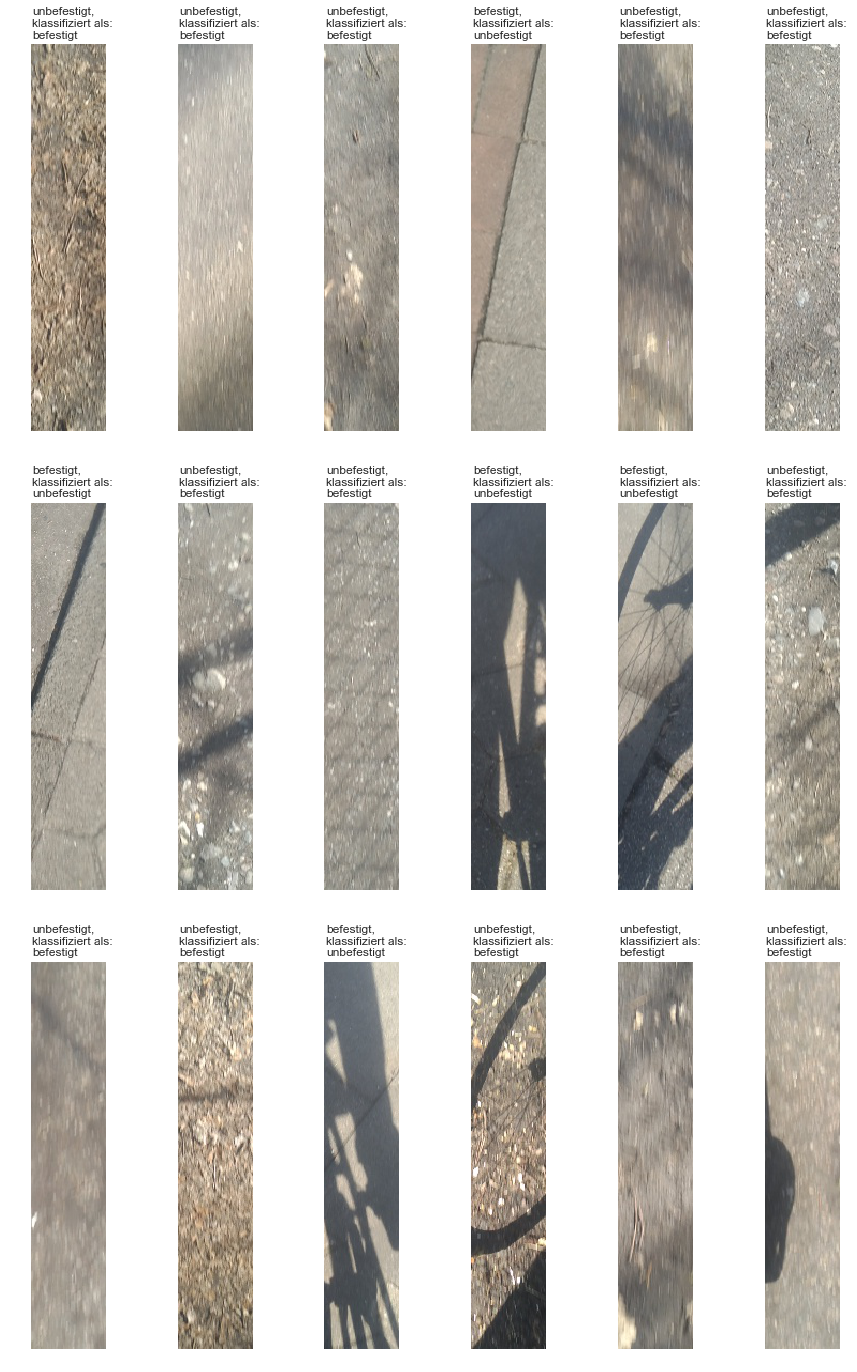

In [115]:
# Plot falsch vorhergesagte Bilder
predictedClasses = model.predict_classes(xTest)   
yTestNumber = np.argmax(yTest, axis=1)
incorrect = []
for i, y in enumerate(yTestNumber):
    if y != predictedClasses[i]:
        incorrect.append(i)
seaborn.set(font_scale=1)
fig = plt.figure(1, figsize=(24,24))
grid = ImageGrid(fig, 111, nrows_ncols=(3, 6), axes_pad=1.0)
for i, incorr in enumerate(incorrect[0:18]):
    ax = grid[i]
    ax.imshow(xTest[incorr], cmap='gray')
    ax.text(1,-20, classNames[yTestNumber[incorr]] + ",\nklassifiziert als: \n" + classNames[predictedClasses[incorr]], verticalalignment='center')
    ax.axis('off')
plt.show() 

In [116]:
predictedClasses[10]

1

In [117]:
score = model.evaluate(xTest, yTest, verbose=1)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

400/400 [==============================] - 0s 633us/step
Test Loss: 0.5133833249099553
Test accuracy: 0.9275


In [118]:
classNames

['unbefestigt', 'befestigt']

In [132]:
# Läd Modell
experiment2_3 = load_model('ergebnisse_versuch2/modell_versuch2_5')

In [133]:
score = experiment2_3.evaluate(xTest, yTest, verbose=1)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

400/400 [==============================] - 1s 2ms/step
Test Loss: 0.35398932951968165
Test accuracy: 0.95


[[202   6]
 [ 14 178]]


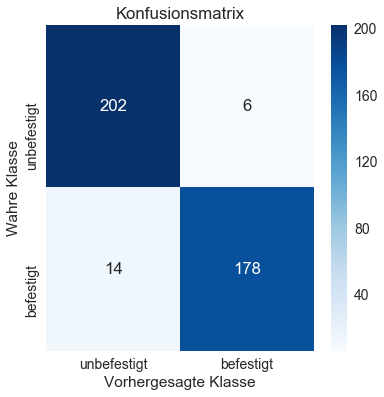

In [134]:
# Konfusionsmatrix
validPreds = experiment2_3.predict(xTest)
validPreds = np.argmax(validPreds, axis=1)
yTestMax = np.argmax(yTest,axis=1)
cnfMatrix = confusion_matrix(yTestMax, validPreds)
print(cnfMatrix)
seaborn.set(font_scale=1.4)
fig, ax = plt.subplots(figsize=(6,6)) 
ax = seaborn.heatmap(cnfMatrix, fmt="d", cmap=plt.cm.Blues, ax=ax , annot=True)
ax.set_xticklabels(classNames)
ax.set_yticklabels(classNames)
plt.title('Konfusionsmatrix')
plt.ylabel('Wahre Klasse')
plt.xlabel('Vorhergesagte Klasse')
plt.savefig('ergebnisse_versuch2/konfusionsmatrix_versuch2_5')
plt.show()